In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [6]:
data = pd.read_csv('/content/data.csv')
data.head()

,Khách hàng,Sản phẩm,Ngày mua,Giá trị,Xu hướng mua sắm,Số lượng,Độ tin cậy của khách hàng,Khu vực,Thời gian mua sắm,Phương pháp thanh toán,Chiến dịch quảng cáo
0,KH01,SP002,27/1/2022,213,Tăng,101,Trung bình,Khu vực B,Buổi tối,Thấp,CD26
1,KH02,SP002,21/1/2022,488,Tăng,191,Thấp,Khu vực C,Buổi sáng,Cao,CD11
2,KH03,SP004,4/1/2022,240,Tăng,77,Cao,Khu vực C,Buổi sáng,Thấp,CD30
3,KH04,SP003,11/1/2022,117,Giảm,181,Thấp,Khu vực C,Buổi tối,Thấp,CD33
4,KH05,SP004,21/1/2022,173,Giảm,98,Cao,Khu vực B,Buổi chiều,Thấp,CD5


In [7]:
X = data.drop(['Phương pháp thanh toán'], axis=1)
y = data['Phương pháp thanh toán']

X = pd.get_dummies(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [10]:
accuracydt = model.score(X_test, y_test)
print("Độ chính xác của cây quyết định:", accuracydt)

Độ chính xác của cây quyết định: 0.4768740031897927


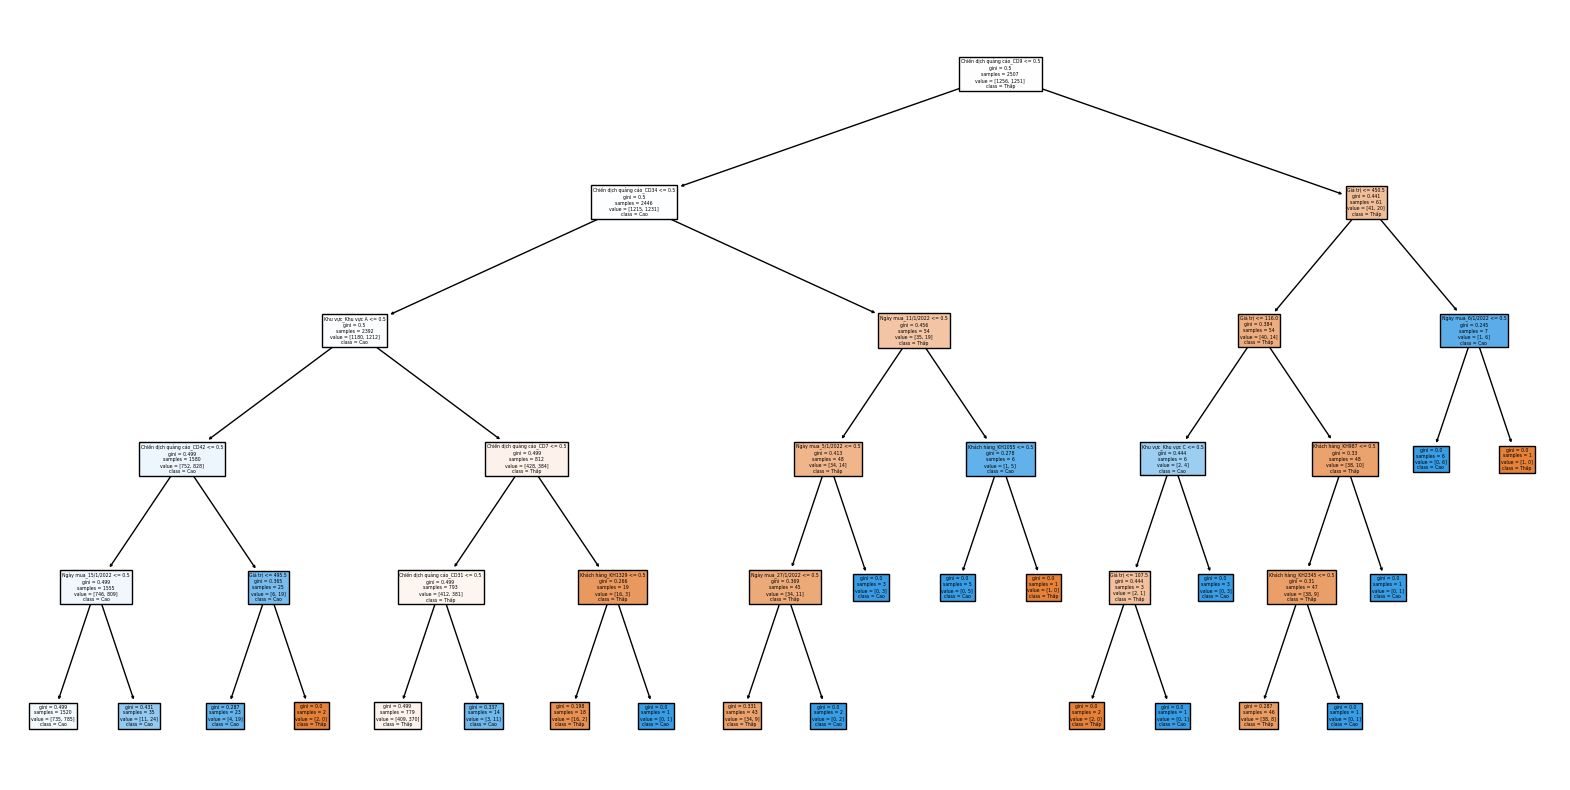

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=y.unique())
plt.savefig('decision_tree.png')

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [13]:
data = pd.read_csv("/content/data.csv")
data.head()

,Khách hàng,Sản phẩm,Ngày mua,Giá trị,Xu hướng mua sắm,Số lượng,Độ tin cậy của khách hàng,Khu vực,Thời gian mua sắm,Phương pháp thanh toán,Chiến dịch quảng cáo
0,KH01,SP002,27/1/2022,213,Tăng,101,Trung bình,Khu vực B,Buổi tối,Thấp,CD26
1,KH02,SP002,21/1/2022,488,Tăng,191,Thấp,Khu vực C,Buổi sáng,Cao,CD11
2,KH03,SP004,4/1/2022,240,Tăng,77,Cao,Khu vực C,Buổi sáng,Thấp,CD30
3,KH04,SP003,11/1/2022,117,Giảm,181,Thấp,Khu vực C,Buổi tối,Thấp,CD33
4,KH05,SP004,21/1/2022,173,Giảm,98,Cao,Khu vực B,Buổi chiều,Thấp,CD5


In [14]:
# Tiền xử lý dữ liệu
data["Ngày mua"] = pd.to_datetime(data["Ngày mua"])
data["Ngày mua"] = data["Ngày mua"].dt.dayofyear
data["Xu hướng mua sắm"] = data["Xu hướng mua sắm"].replace({"Tăng": 1, "Giảm": 0})
data["Độ tin cậy của khách hàng"] = data["Độ tin cậy của khách hàng"].replace({"Thấp": 0, "Trung bình": 1, "Cao": 2})
data["Thời gian mua sắm"] = data["Thời gian mua sắm"].replace({"Buổi sáng": 0, "Buổi chiều": 1, "Buổi tối": 2})
data["Phương pháp thanh toán"] = data["Phương pháp thanh toán"].replace({"Thấp": 0, "Cao": 1})
data["Chiến dịch quảng cáo"] = data["Chiến dịch quảng cáo"].str.extract('(\d+)', expand=False).astype(int)
data["Khu vực"] = pd.Categorical(data["Khu vực"]).codes


In [15]:
# Chọn các đặc trưng và nhãn
X = data.drop(["Khách hàng", "Sản phẩm", "Giá trị"], axis=1)
y = data["Khu vực"]

In [16]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Huấn luyện mô hình Random Forest với 100 cây quyết định
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Đánh giá độ chính xác của mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
accuracyrf = accuracy_score(y_test, y_pred)
print("Độ chính xác của rừng ngẫu nhiên:", accuracyrf)

Độ chính xác của rừng ngẫu nhiên: 1.0


In [19]:
# Lấy danh sách các sản phẩm
products = data["Sản phẩm"].unique()

In [22]:
# Tạo một dictionary để lưu thông tin của từng sản phẩm
product_counts = {}

In [23]:
# Đếm số lượng mua của mỗi sản phẩm
for product in products:
    count = data[data["Sản phẩm"] == product]["Số lượng"].sum()
    product_counts[product] = count

# Chọn sản phẩm có số lượng mua cao nhất
trend_product = max(product_counts, key=product_counts.get)

print("Sản phẩm được chọn là xu hướng mua sắm:", trend_product)

Sản phẩm được chọn là xu hướng mua sắm: SP005


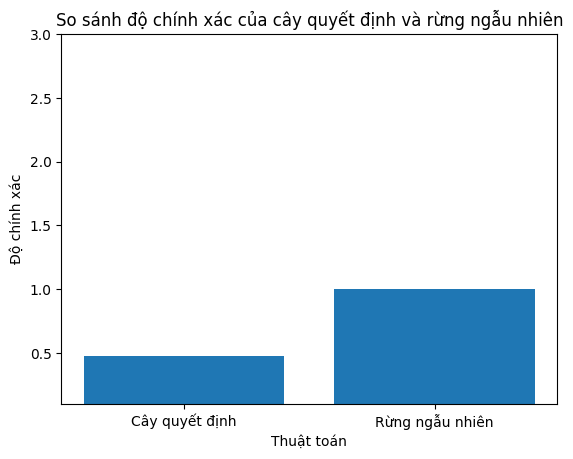

In [24]:
#So sánh độ chính xác của cây quyết định và rừng ngẫu nhiên
# Tạo danh sách tên của các thuật toán và độ chính xác của chúng
algorithm_names = ['Cây quyết định', 'Rừng ngẫu nhiên']
accuracy_scores = [accuracydt, accuracyrf]

# Vẽ biểu đồ cột
plt.bar(algorithm_names, accuracy_scores)
plt.ylim([0.1, 3.0]) # Đặt giới hạn trục y từ 0.5 đến 1.0
plt.title('So sánh độ chính xác của cây quyết định và rừng ngẫu nhiên')
plt.xlabel('Thuật toán')
plt.ylabel('Độ chính xác')
plt.show()